# Flower-Power

In diesem Notebook wird der `Iris-Datensatz` erfroscht und versucht mit verschiedenen Clustering Methoden validiert.

Um das Notebook ausführe zu könnnen muss zuerst eine entsprechende Conda-Environment aufgesetzt werden. Um Versionenkonformzu sein wurde ein `plotly.yml` erstellt, welche alle passenden Versionen enthält.

**WICHTIG: NUR JUPYTER NOTEBOOK VERWENDEN - NICHT JUPYTER LAB!!**

## Conda ENV aufsetzen

1. In passenden Ordner mit dem Terminal navigieren. (In meinem Fall  habe ich das im Homeverzeichnis) gemacht.
2. Ordner für die Aufgabe erstellen und `plotly.yml` file dort hineinlegen
3. Mit dem Terminal innerhalb des Ordners folgenden Befehl eingeben:

```bash
conda env create -f plotly.yml
```

4. Um die neue Environment nun zu starten:

```bash
conda activate plotly
```

5. Jupyter Notebook starten

```bash
jupyter notebook
```

6. Innerhalb der Oberfläche in Google Chrom dieses Notebook ablegen und starten

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = px.data.iris()
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1

In [46]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')

# Data Exploration

In [6]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length")
fig.show()

Man kann eine leichte Korrleation zwischen `sepal_length` und `sepal_width` vermuten.

In [8]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

Man kann  eine erste Clusterung zwischen den drei Spezien vermuten.

In [10]:
import warnings
warnings.filterwarnings('ignore')

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()

Hoffe du kannst das interepretieren :D Über dem Plot siehst du ein Boxplot und rechts einfach einen Violinplot mit der Verteilung.
Innerhalb des Plots sind dann ebenfalls noch die Trend(Regressions)linien eingezeichnet.

In [12]:
fig = px.scatter(df, x="petal_length", y="petal_width", facet_col="species",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")
fig.show()

Klarer unterschied zwischen den Arten zu erkennen! Wichitiger Graph um zu erkennen worin sie sich unterscheiden. Da sich die Plots die Achsen teilen kann man das ganze gut vergleichen!

Nun wird noch  die Korrelation überprüft:

In [13]:
fig = px.density_heatmap(iris, x="sepal_width", y="sepal_length",
                         marginal_x="rug", marginal_y="histogram")
fig.show()

In [14]:
fig = px.density_contour(iris, x="sepal_width", y="sepal_length", color="species",
                         marginal_x="rug", marginal_y="histogram")
fig.show()

<Figure size 1152x720 with 0 Axes>

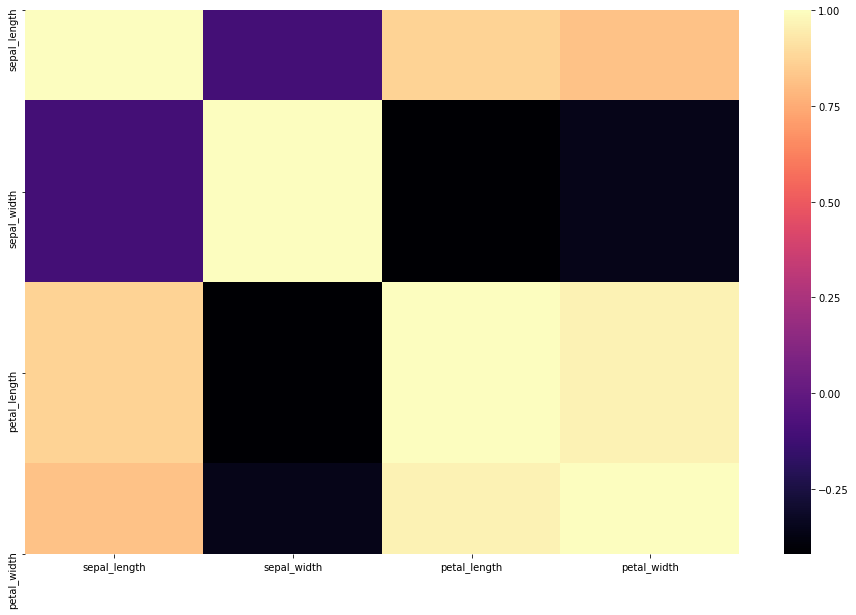

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
ax = sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length',
                     'petal_width', 'species']].corr(), cmap='magma')
plt.show()

In [35]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [37]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

3 Cluster erscheinen am besten - Ellbow-Methode.

In [38]:
#Anwenden der 3 Cluster auf den Datensatz

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [41]:
len(y_kmeans)

150

In [42]:
len(x)

150

In [44]:
# pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

In [49]:
final_df = pd.DataFrame(x, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [50]:
final_df

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [51]:
final_df['cluster'] = y_kmeans

In [52]:
final_df.head(3)

sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1

In [57]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Cluster befinden sich  in dem pberhalb dargestellten array. Da  wird anhand der sepal_length und sepal_width plotten wollen, sind nur die ersten beiden Werte innerhalb  des arrays interessant. NUmmer 3 und 4 beziehen sich auf die petal_length und petal_width.

In [60]:
centroide = pd.DataFrame(kmeans.cluster_centers_, columns=['sepal_length', 'sepal_width',
                                                           'petal_length', 'petal_width'])

In [61]:
centroide

sepal_length  sepal_width  petal_length  petal_width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.418000      1.464000     0.244000
2      6.850000     3.073684      5.742105     2.071053

In [68]:
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
fig.add_trace(
    go.Scatter(
        x=centroide.sepal_length,
        y=centroide.sepal_width,
        showlegend=False)
)
fig.show();

# Der Plot oberhalb zeigt die 3 erstellten Cluster!